# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Asdar Widyananda
- **Email:** Mawidyananda01@gmail.com
- **ID Dicoding:** widyananda01

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh faktor cuaca terhadap jumlah penyewaan sepeda?
- Pertanyaan 2 : Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda antara hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
day_df = pd.read_csv("/content/drive/MyDrive/dicoding/day.csv")
hour_df = pd.read_csv("/content/drive/MyDrive/dicoding/hour.csv")


In [6]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

####Pengecekan `day_df`

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [11]:
# mengubah 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# cek data yang ter-duplikat dan menhapus data jika diperlukan
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

### EDA 1
Melihat distribusi jumlah penyewaan sepeda (cnt) untuk memahami bagaimana data penyewaan tersebar. Ini akan memberi kita wawasan tentang apakah sebagian besar penyewaan terkonsentrasi pada nilai tertentu atau tersebar merata.

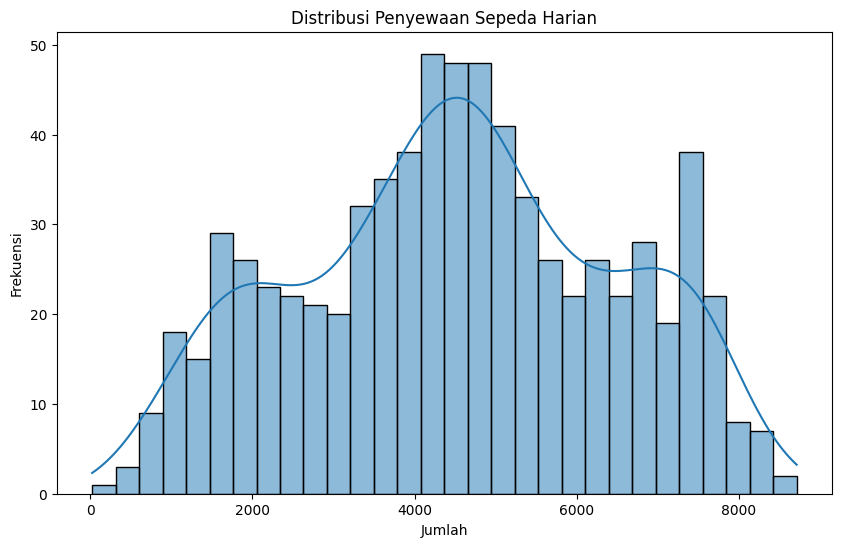

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True, color='blue')
plt.title('Distribusi Jumlah Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

Penjelasan
Histogram dengan kurva KDE (Kernel Density Estimate) akan menunjukkan seberapa sering jumlah penyewaan sepeda terjadi pada rentang nilai tertentu. Ini membantu kita melihat apakah ada mode tertentu atau apakah data penyewaan tersebar secara merata.

### EDA 2
Menganalisis pengaruh musim (season) terhadap jumlah penyewaan sepeda. Musim dapat memengaruhi seberapa sering orang menyewa sepeda.

<ipython-input-29-388f05006f0d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=day_df, palette='Set2')


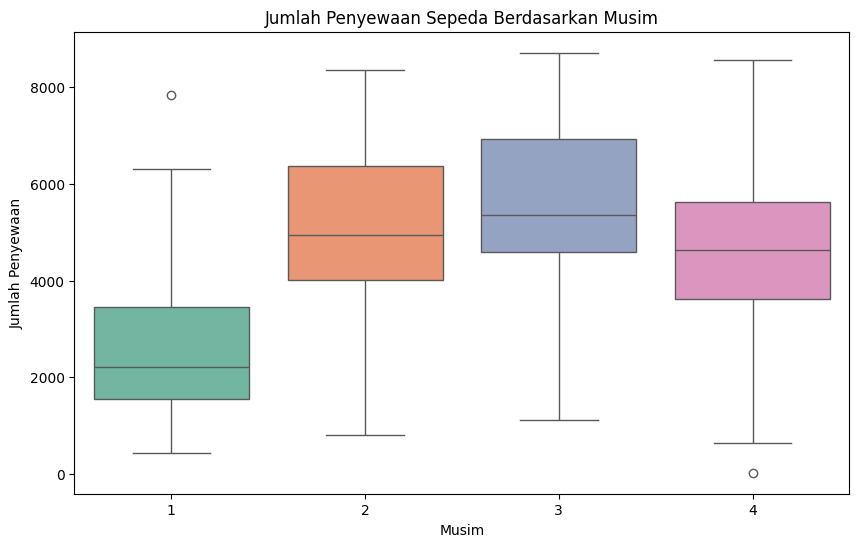

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_df, palette='Set2')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Boxplot menunjukkan distribusi jumlah penyewaan sepeda di setiap musim. Ini membantu kita memahami apakah ada perbedaan signifikan dalam penyewaan sepeda antar musim, serta mendeteksi outlier.



### EDA 3
Menganalisis bagaimana jumlah penyewaan sepeda berubah berdasarkan hari dalam seminggu (weekday). Ini bisa menunjukkan pola aktivitas mingguan.

<ipython-input-30-1280bfee76d5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=day_df, palette='coolwarm')


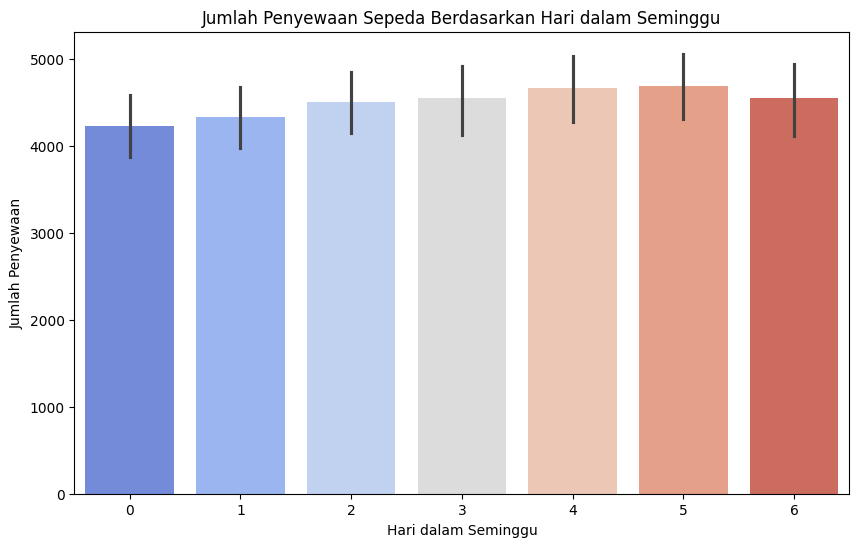

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=day_df, palette='coolwarm')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Penjelasan :
Barplot menunjukkan rata-rata jumlah penyewaan sepeda untuk setiap hari dalam seminggu. Ini membantu kita melihat apakah ada hari tertentu yang memiliki jumlah penyewaan lebih tinggi atau lebih rendah.



### EDA 4
Menganalisis hubungan antara suhu (temp) dan jumlah penyewaan sepeda untuk melihat apakah suhu berpengaruh pada frekuensi penyewaan.

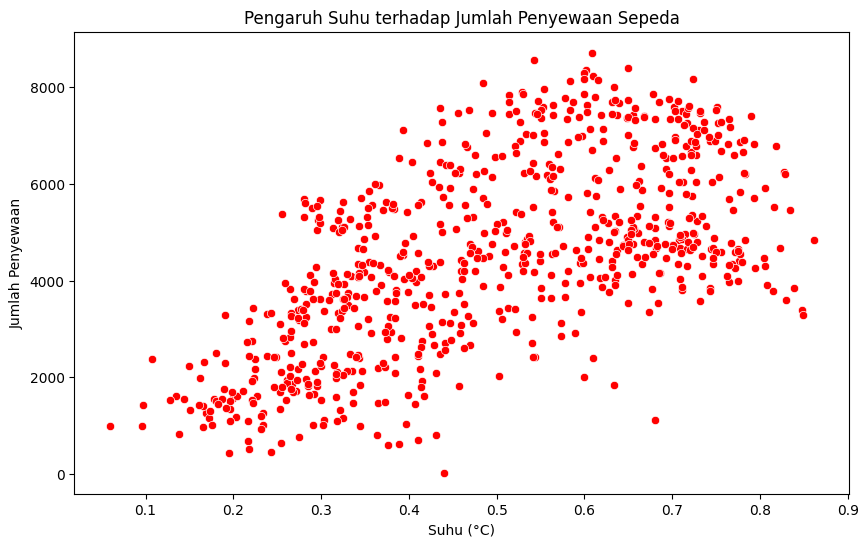

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df, color='red')
plt.title('Pengaruh Suhu terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu (°C)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Penjelasan :
Scatter plot ini menunjukkan hubungan antara suhu dan jumlah penyewaan sepeda. Jika ada pola tertentu atau hubungan linier, ini akan terlihat jelas di plot ini.

### EDA 5
Menganalisis bagaimana jumlah penyewaan sepeda berbeda antara hari kerja (workingday) dan hari libur (holiday).

<ipython-input-32-3fe16db88b27>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workingday', y='cnt', data=day_df, palette='Paired')


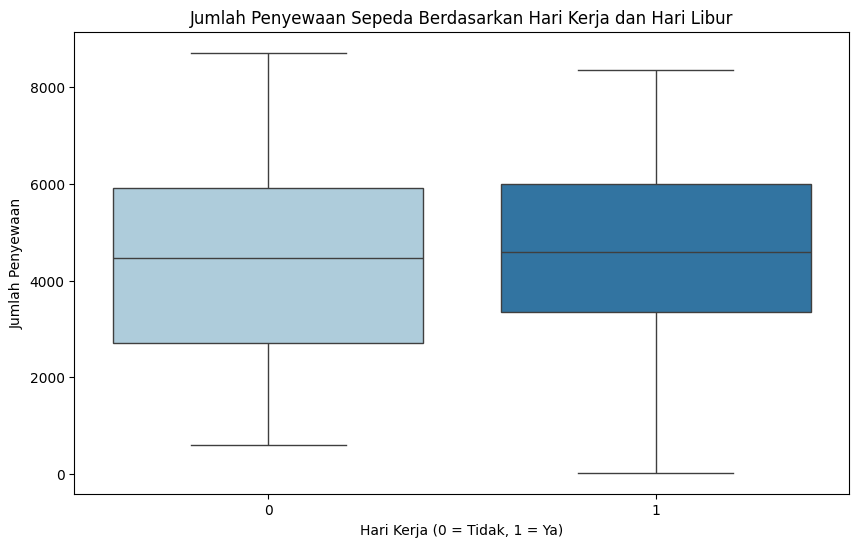

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=day_df, palette='Paired')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari Kerja dan Hari Libur')
plt.xlabel('Hari Kerja (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Penjelasan :
Boxplot ini menunjukkan distribusi jumlah penyewaan sepeda pada hari kerja dan hari libur. Ini membantu untuk melihat apakah ada perbedaan signifikan dalam jumlah penyewaan berdasarkan tipe hari.



## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh faktor cuaca terhadap jumlah penyewaan sepeda?

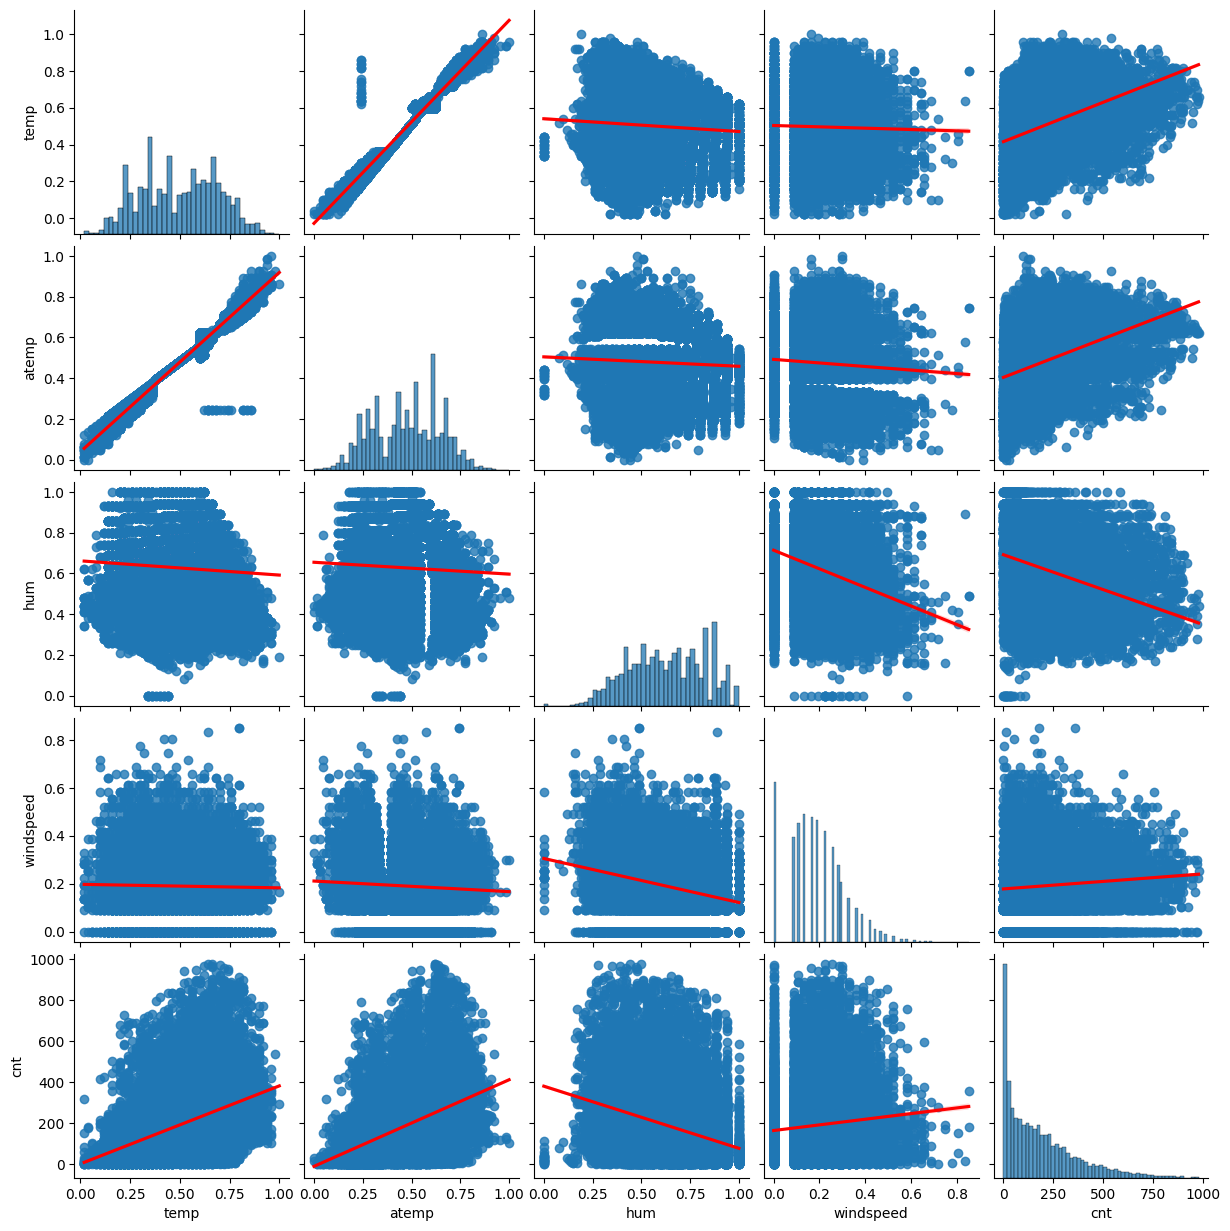

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.987672 -0.069881  -0.023125  0.404772
atemp      0.987672  1.000000 -0.051918  -0.062336  0.400929
hum       -0.069881 -0.051918  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.062336 -0.290105   1.000000  0.093234
cnt        0.404772  0.400929 -0.322911   0.093234  1.000000


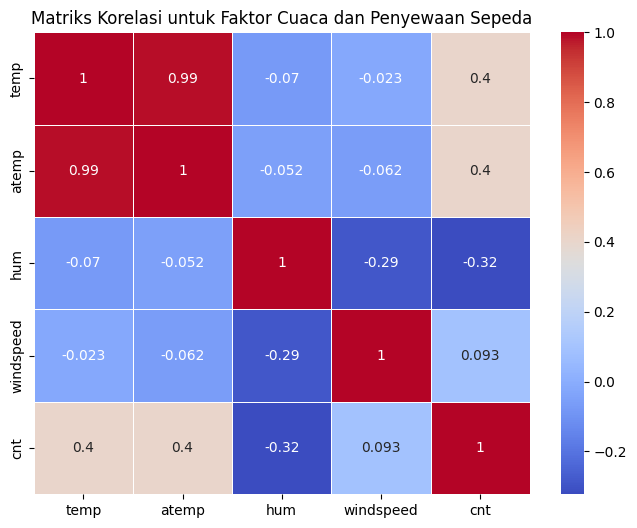

In [33]:
# Pairplot untuk fitur terkait cuaca
sns.pairplot(hour_df, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'], kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

# Matriks korelasi
correlation_matrix = hour_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
print(correlation_matrix)

# Heatmap untuk matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi untuk Faktor Cuaca dan Penyewaan Sepeda')
plt.show()

Korelasi Antar Faktor Cuaca:

- temp dan atemp: Korelasi sebesar 0.99 menunjukkan hubungan yang sangat kuat dan positif antara suhu dan suhu yang dirasakan. Ini wajar karena suhu yang dirasakan sangat dipengaruhi oleh suhu aktual.
- temp dan hum: Korelasi sebesar -0.07 menunjukkan hubungan yang sangat lemah dan negatif antara suhu dan kelembaban.
- temp dan windspeed: Korelasi sebesar -0.023 menunjukkan hubungan yang sangat lemah dan negatif antara suhu dan kecepatan angin.
- atemp dan hum: Korelasi sebesar -0.052 menunjukkan hubungan yang sangat lemah dan negatif antara suhu yang dirasakan dan kelembaban.
- atemp dan windspeed: Korelasi sebesar -0.062 menunjukkan hubungan yang sangat lemah dan negatif antara suhu yang dirasakan dan kecepatan angin.
- hum dan windspeed: Korelasi sebesar -0.29 menunjukkan hubungan negatif antara kelembaban dan kecepatan angin, meskipun tidak terlalu kuat.


Kesimpulan Utama:
1. Suhu (temp dan atemp): Memiliki korelasi positif moderat dengan jumlah penyewaan sepeda (cnt). Ini berarti lebih banyak sepeda disewa pada suhu yang lebih tinggi.
2. Kelembaban (hum): Memiliki korelasi negatif dengan jumlah penyewaan sepeda. Ini berarti lebih sedikit sepeda disewa ketika kelembaban lebih tinggi.
3. Kecepatan Angin (windspeed): Memiliki korelasi yang sangat lemah dengan jumlah penyewaan sepeda, sehingga pengaruhnya bisa dianggap minimal.
Secara keseluruhan, faktor cuaca yang paling signifikan yang mempengaruhi jumlah penyewaan sepeda adalah suhu dan kelembaban.

### Pertanyaan 2: Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda antara hari kerja dan hari libur?

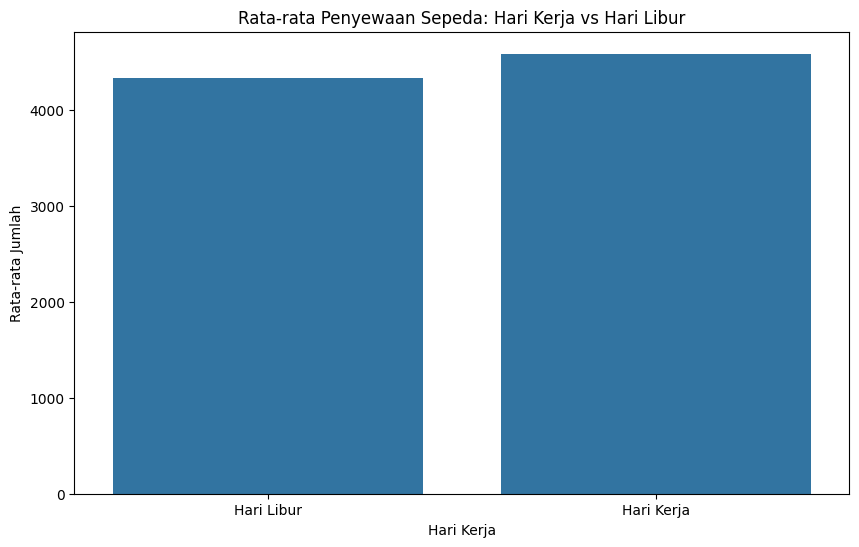

T-Statistik: 1.6543102137118633, P-Value: 0.09849496160024913


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Mengelompokkan berdasarkan workingday dan menghitung rata-rata jumlah penyewaan
workingday_mean = day_df.groupby('workingday')['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=workingday_mean)
plt.title('Rata-rata Penyewaan Sepeda: Hari Kerja vs Hari Libur')
plt.xlabel('Hari Kerja')
plt.ylabel('Rata-rata Jumlah')
plt.xticks([0, 1], ['Hari Libur', 'Hari Kerja'])
plt.show()

# Uji T
workingday_rentals = day_df[day_df['workingday'] == 1]['cnt']
holiday_rentals = day_df[day_df['workingday'] == 0]['cnt']
t_stat, p_val = ttest_ind(workingday_rentals, holiday_rentals)

print(f"T-Statistik: {t_stat}, P-Value: {p_val}")

Diagram  menunjukkan perbandingan rata-rata jumlah penyewaan sepeda antara hari kerja dan hari libur. Diagram tersebut juga mencantumkan nilai T-Statistik dan P-Value dari uji statistik yang dilakukan untuk membandingkan kedua kelompok ini. Berikut adalah penjelasannya:

1. **Rata-rata Penyewaan Sepeda**:
   - **Hari Libur**: Rata-rata penyewaan sepeda mendekati sekitar 4500.
   - **Hari Kerja**: Rata-rata penyewaan sepeda juga mendekati sekitar 4500.

2. **T-Statistik**:
   - Nilai T-Statistik yang diberikan adalah 1.6543. T-Statistik adalah ukuran dari seberapa besar perbedaan antara kedua kelompok tersebut relatif terhadap variasi dalam data.

3. **P-Value**:
   - Nilai P-Value yang diberikan adalah 0.0984. P-Value menunjukkan probabilitas bahwa perbedaan yang diamati antara dua kelompok adalah karena kebetulan semata.

Interpretasi:
- **Nilai P-Value**: Dalam konteks statistik, nilai P-Value di bawah 0.05 (sering digunakan sebagai batas signifikansi) biasanya dianggap sebagai bukti yang cukup untuk menolak hipotesis nol, yang menyatakan bahwa tidak ada perbedaan signifikan antara kedua kelompok.
  - Dalam kasus ini, P-Value adalah 0.0984, yang lebih besar dari 0.05. Ini menunjukkan bahwa tidak ada bukti yang cukup untuk menyatakan perbedaan yang signifikan secara statistik dalam jumlah penyewaan sepeda antara hari kerja dan hari libur.
  
- **Kesimpulan**: Berdasarkan nilai P-Value dan T-Statistik yang diberikan, kita dapat menyimpulkan bahwa tidak ada perbedaan signifikan dalam jumlah penyewaan sepeda antara hari kerja dan hari libur. Meskipun ada perbedaan kecil dalam rata-rata, perbedaan tersebut tidak cukup besar untuk dianggap signifikan secara statistik.

Ini berarti bahwa penyewaan sepeda cenderung tetap konsisten antara hari kerja dan hari libur menurut data yang ditampilkan.

## Conclusion

Conclution pertanyaan 1:

1. Suhu (temp dan atemp): Memiliki korelasi positif moderat dengan jumlah penyewaan sepeda (cnt). Ini berarti lebih banyak sepeda disewa pada suhu yang lebih tinggi.
2. Kelembaban (hum): Memiliki korelasi negatif dengan jumlah penyewaan sepeda. Ini berarti lebih sedikit sepeda disewa ketika kelembaban lebih tinggi.
3. Kecepatan Angin (windspeed): Memiliki korelasi yang sangat lemah dengan jumlah penyewaan sepeda, sehingga pengaruhnya bisa dianggap minimal.
Secara keseluruhan, faktor cuaca yang paling signifikan yang mempengaruhi jumlah penyewaan sepeda adalah suhu dan kelembaban.

Conclution pertanyaan 2 :  

Tidak ada perbedaan yang signifikan secara statistik dalam jumlah penyewaan sepeda antara hari kerja dan hari libur. Meskipun terdapat perbedaan kecil dalam rata-rata jumlah penyewaan sepeda antara kedua hari tersebut, perbedaan tersebut tidak cukup besar untuk dianggap signifikan berdasarkan uji statistik yang dilakukan (dengan T-Statistik sebesar 1.6543 dan P-Value sebesar 0.0984).

Dengan kata lain, jumlah penyewaan sepeda cenderung konsisten antara hari kerja dan hari libur.